In [2]:
import pandas as pd
import pandas.tseries
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np 
from statsmodels.tsa.arima_model import ARIMA
from numpy import sqrt
from sklearn.metrics import mean_squared_error

In [3]:
imm = pd.read_excel('Data/Total_immigration_by_year.xlsx') 
imm.set_index('Year', inplace = True) #set index as year
imm.index= imm.index.astype(str) #change to str for date time format
imm.index = pd.to_datetime(imm.index)
by_year_df = pd.read_csv('pop_all.csv')
by_year_df.index= imm.index
total_immigration = by_year_df['Pop_Perc'].to_frame()
# total_immi
# by_year_df.head()
start_date = '1930'
data = by_year_df[start_date:]
data.head()

,Number,Population (in thousands),Real GDP per capita (year 2012 dollars),Pop_Perc
Year,,,,
1930-01-01,241700.0,123188.0,8240.25,0.001962
1931-01-01,97139.0,124149.0,7652.10,0.000782
1932-01-01,35576.0,124949.0,6622.70,0.000285
1933-01-01,23068.0,125690.0,6502.51,0.000184
1934-01-01,29470.0,126485.0,7159.74,0.000233


In [4]:
#checking for stationarity 
from statsmodels.tsa.vector_ar.vecm import coint_johansen
#since the test works for only 12 variables, I have randomly dropped
#in the next iteration, I would drop another and check the eigenvalues
coint_johansen(data,-1,1).eig

array([0.26927011, 0.13501081, 0.08937789, 0.00682927])

In [5]:
#creating the train and validation set
train = data[:int(0.8*(len(data)))]
valid = data[int(0.8*(len(data))):]

#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [6]:
#converting predictions to dataframe
cols = data.columns
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,4):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

#check rmse
for i in cols:
    print('rmse value for', i, 'is : ', sqrt(mean_squared_error(pred[i], valid[i])))

rmse value for Number is :  221741.10493972086
rmse value for Population (in thousands) is :  9764.958258908877
rmse value for Real GDP per capita (year 2012 dollars) is :  2542.175187441708
rmse value for Pop_Perc is :  0.0013870539041846784


In [7]:
#make final predictions
model = VAR(endog=data)
model_fit = model.fit()
yhat10 = model_fit.forecast(model_fit.y, steps=10)
print(yhat10)

[[1.14234583e+06 3.28377319e+05 5.62026687e+04 3.52975198e-03]
 [1.16534490e+06 3.30852539e+05 5.70039802e+04 3.62796842e-03]
 [1.19197333e+06 3.33401685e+05 5.77779699e+04 3.73603684e-03]
 [1.21970255e+06 3.36016216e+05 5.85279167e+04 3.84443240e-03]
 [1.24710446e+06 3.38687482e+05 5.92580774e+04 3.94808139e-03]
 [1.27345841e+06 3.41407512e+05 5.99728608e+04 4.04471222e-03]
 [1.29848170e+06 3.44169377e+05 6.06763753e+04 4.13373858e-03]
 [1.32214870e+06 3.46967292e+05 6.13722142e+04 4.21552120e-03]
 [1.34457267e+06 3.49796574e+05 6.20633860e+04 4.29089405e-03]
 [1.36593106e+06 3.52653528e+05 6.27523269e+04 4.36087186e-03]]


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


In [8]:
data.columns

Index(['Number', 'Population (in thousands)',
       'Real GDP per capita (year 2012 dollars)', 'Pop_Perc'],
      dtype='object')

In [9]:
data_viz = data.drop(columns=['Number'])

In [10]:
data_viz.head() 

,Population (in thousands),Real GDP per capita (year 2012 dollars),Pop_Perc
Year,,,
1930-01-01,123188.0,8240.25,0.001962
1931-01-01,124149.0,7652.10,0.000782
1932-01-01,124949.0,6622.70,0.000285
1933-01-01,125690.0,6502.51,0.000184
1934-01-01,126485.0,7159.74,0.000233


In [11]:
data_viz.tail()

,Population (in thousands),Real GDP per capita (year 2012 dollars),Pop_Perc
Year,,,
2013-01-01,316598.0,52102.03,0.003129
2014-01-01,318953.0,52985.24,0.003187
2015-01-01,321323.0,54109.73,0.003271
2016-01-01,323668.0,54559.61,0.003657
2017-01-01,325983.0,55373.13,0.003458


In [12]:
pred_df = pd.DataFrame(yhat10)
pred_df.drop([0], axis=1, inplace=True)
pred_df.columns = ['Population (in thousands)',
       'Real GDP per capita (year 2012 dollars)', 'Pop_Perc']
pred_df.shape

(10, 3)

In [16]:
# pred_df.index
times = pd.DatetimeIndex(freq='Y', start='2018', periods=10)
pred_df.index = times
pred_df.head() 
# times
# data['1850':].corr()

,Population (in thousands),Real GDP per capita (year 2012 dollars),Pop_Perc
2018-12-31,328377.319189,56202.668706,0.003530
2019-12-31,330852.538657,57003.980199,0.003628
2020-12-31,333401.684956,57777.969866,0.003736
2021-12-31,336016.215886,58527.916659,0.003844
2022-12-31,338687.481586,59258.077390,0.003948


In [ ]:
'Population (in thousands)',
       'Real GDP per capita (year 2012 dollars)', 'Pop_Perc'
data_viz.drop('Population (in thousands)', )

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c2181c358>,
      dtype=object)

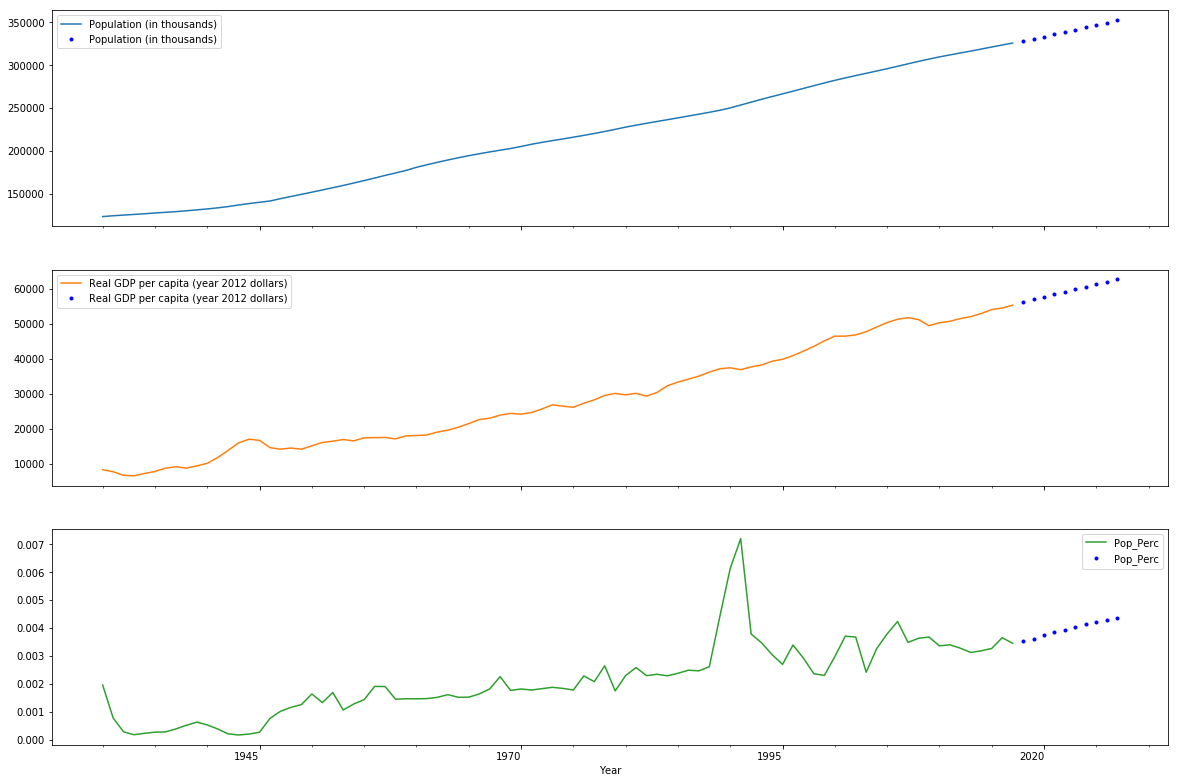

In [17]:
# pred_df_viz = data_viz.append(pred_df)
# pred_df_viz.plot()
ax = data_viz.plot(label='observed', figsize=(20,15), subplots='true')
pred_df.plot(ax=ax, label='forecast', subplots='true', style='b.')


In [18]:
# data_viz = data_viz['2000':]
# test = data_viz.append(pred_df)
pred_df.tail(10)

,Population (in thousands),Real GDP per capita (year 2012 dollars),Pop_Perc
2018-12-31,328377.319189,56202.668706,0.003530
2019-12-31,330852.538657,57003.980199,0.003628
2020-12-31,333401.684956,57777.969866,0.003736
2021-12-31,336016.215886,58527.916659,0.003844
2022-12-31,338687.481586,59258.077390,0.003948
2023-12-31,341407.511713,59972.860784,0.004045
2024-12-31,344169.376732,60676.375262,0.004134
2025-12-31,346967.291712,61372.214217,0.004216
2026-12-31,349796.574185,62063.386004,0.004291
2027-12-31,352653.527952,62752.326902,0.004361


In [ ]:
2027-01-01	 356686.972176	 62747.206804	 0.004026